In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import matplotlib to show plots inline.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

import astropy.units as u
import matplotlib as mpl
import sys 
sys.path.append("..")
from plot_OpSims import plot_OpSims_hist

In [3]:
# import maf python modules
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles

In [4]:
# import convenience functions
import sys 
sys.path.append("../../LSST_OpSim")
from Scripts_NBs.opsimUtils import *

## Load the results
We first load the results of the run into memory. We will read jointly the FBS v1.5 and FBS v1.6 results, and will differentiate at the time of plotting.

In [5]:
your_username = "rjassef"
folder_mafoutput = "Color_EM5"
resultDbPath = '/home/idies/workspace/Storage/{0}/persistent/MAFOutput/{1}'.format(
    your_username, folder_mafoutput)
metricDataPath = '/home/idies/workspace/Storage/{0}/persistent/MAFOutput/{1}/MetricData/'.format(
    your_username, folder_mafoutput)

In [6]:
# get a dictionary of resultDb from given directory
resultDbs = getResultsDbs(resultDbPath)

In [7]:
# retrieve metricBundles for each opsim run and store them in a dictionary
bundleDicts_raw = dict()
for runName in resultDbs:
    bundleDicts_raw[runName] = bundleDictFromDisk(resultDbs[runName], runName, metricDataPath)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slic

In [8]:
#Rearrange the bundleDicts_raw dictionary so that the keys are always the same as for the first run.
dbRuns = list(resultDbs.keys())
Keys = list(bundleDicts_raw[dbRuns[0]].keys())
bundleDicts = dict()
for runName in dbRuns:
    bundleDicts[runName] = dict()
    Keys_raw = bundleDicts_raw[runName]
    for Key in Keys:
        for Key_raw in Keys_raw:
            if Key[1]==Key_raw[1]:
                bundleDicts[runName][Key] = bundleDicts_raw[runName][Key_raw]

In [9]:
# check keys
bd_keys = list(bundleDicts[dbRuns[0]].keys())
print(bd_keys, len(list(bundleDicts.keys())), len(list(bundleDicts_raw.keys())))
print(Keys)

[(1, 'Exgalm5_color_with_cuts_AGN_ug_mean'), (2, 'Exgalm5_color_with_cuts_AGN_gr_mean'), (3, 'Exgalm5_color_with_cuts_AGN_ri_mean'), (4, 'Exgalm5_color_with_cuts_AGN_iz_mean'), (5, 'Exgalm5_color_with_cuts_AGN_zy_mean')] 85 85
[(1, 'Exgalm5_color_with_cuts_AGN_ug_mean'), (2, 'Exgalm5_color_with_cuts_AGN_gr_mean'), (3, 'Exgalm5_color_with_cuts_AGN_ri_mean'), (4, 'Exgalm5_color_with_cuts_AGN_iz_mean'), (5, 'Exgalm5_color_with_cuts_AGN_zy_mean')]


# i=24.5, z=2.0

In [10]:
imag = 24.5
z = 2.0

In [11]:
from quasar_colors.quasar_colors import Temple_colors

### u-g

In [12]:
quasar_color = Temple_colors('u-g',z,imag)
print(quasar_color)
def color_excess(color):
    return color-quasar_color

-0.0905


(1, 'Exgalm5_color_with_cuts_AGN_ug_mean')
filterdist_indx3_v1.5_10yrs -1.5225224478571264
filterdist_indx4_v1.5_10yrs -0.618339309116211


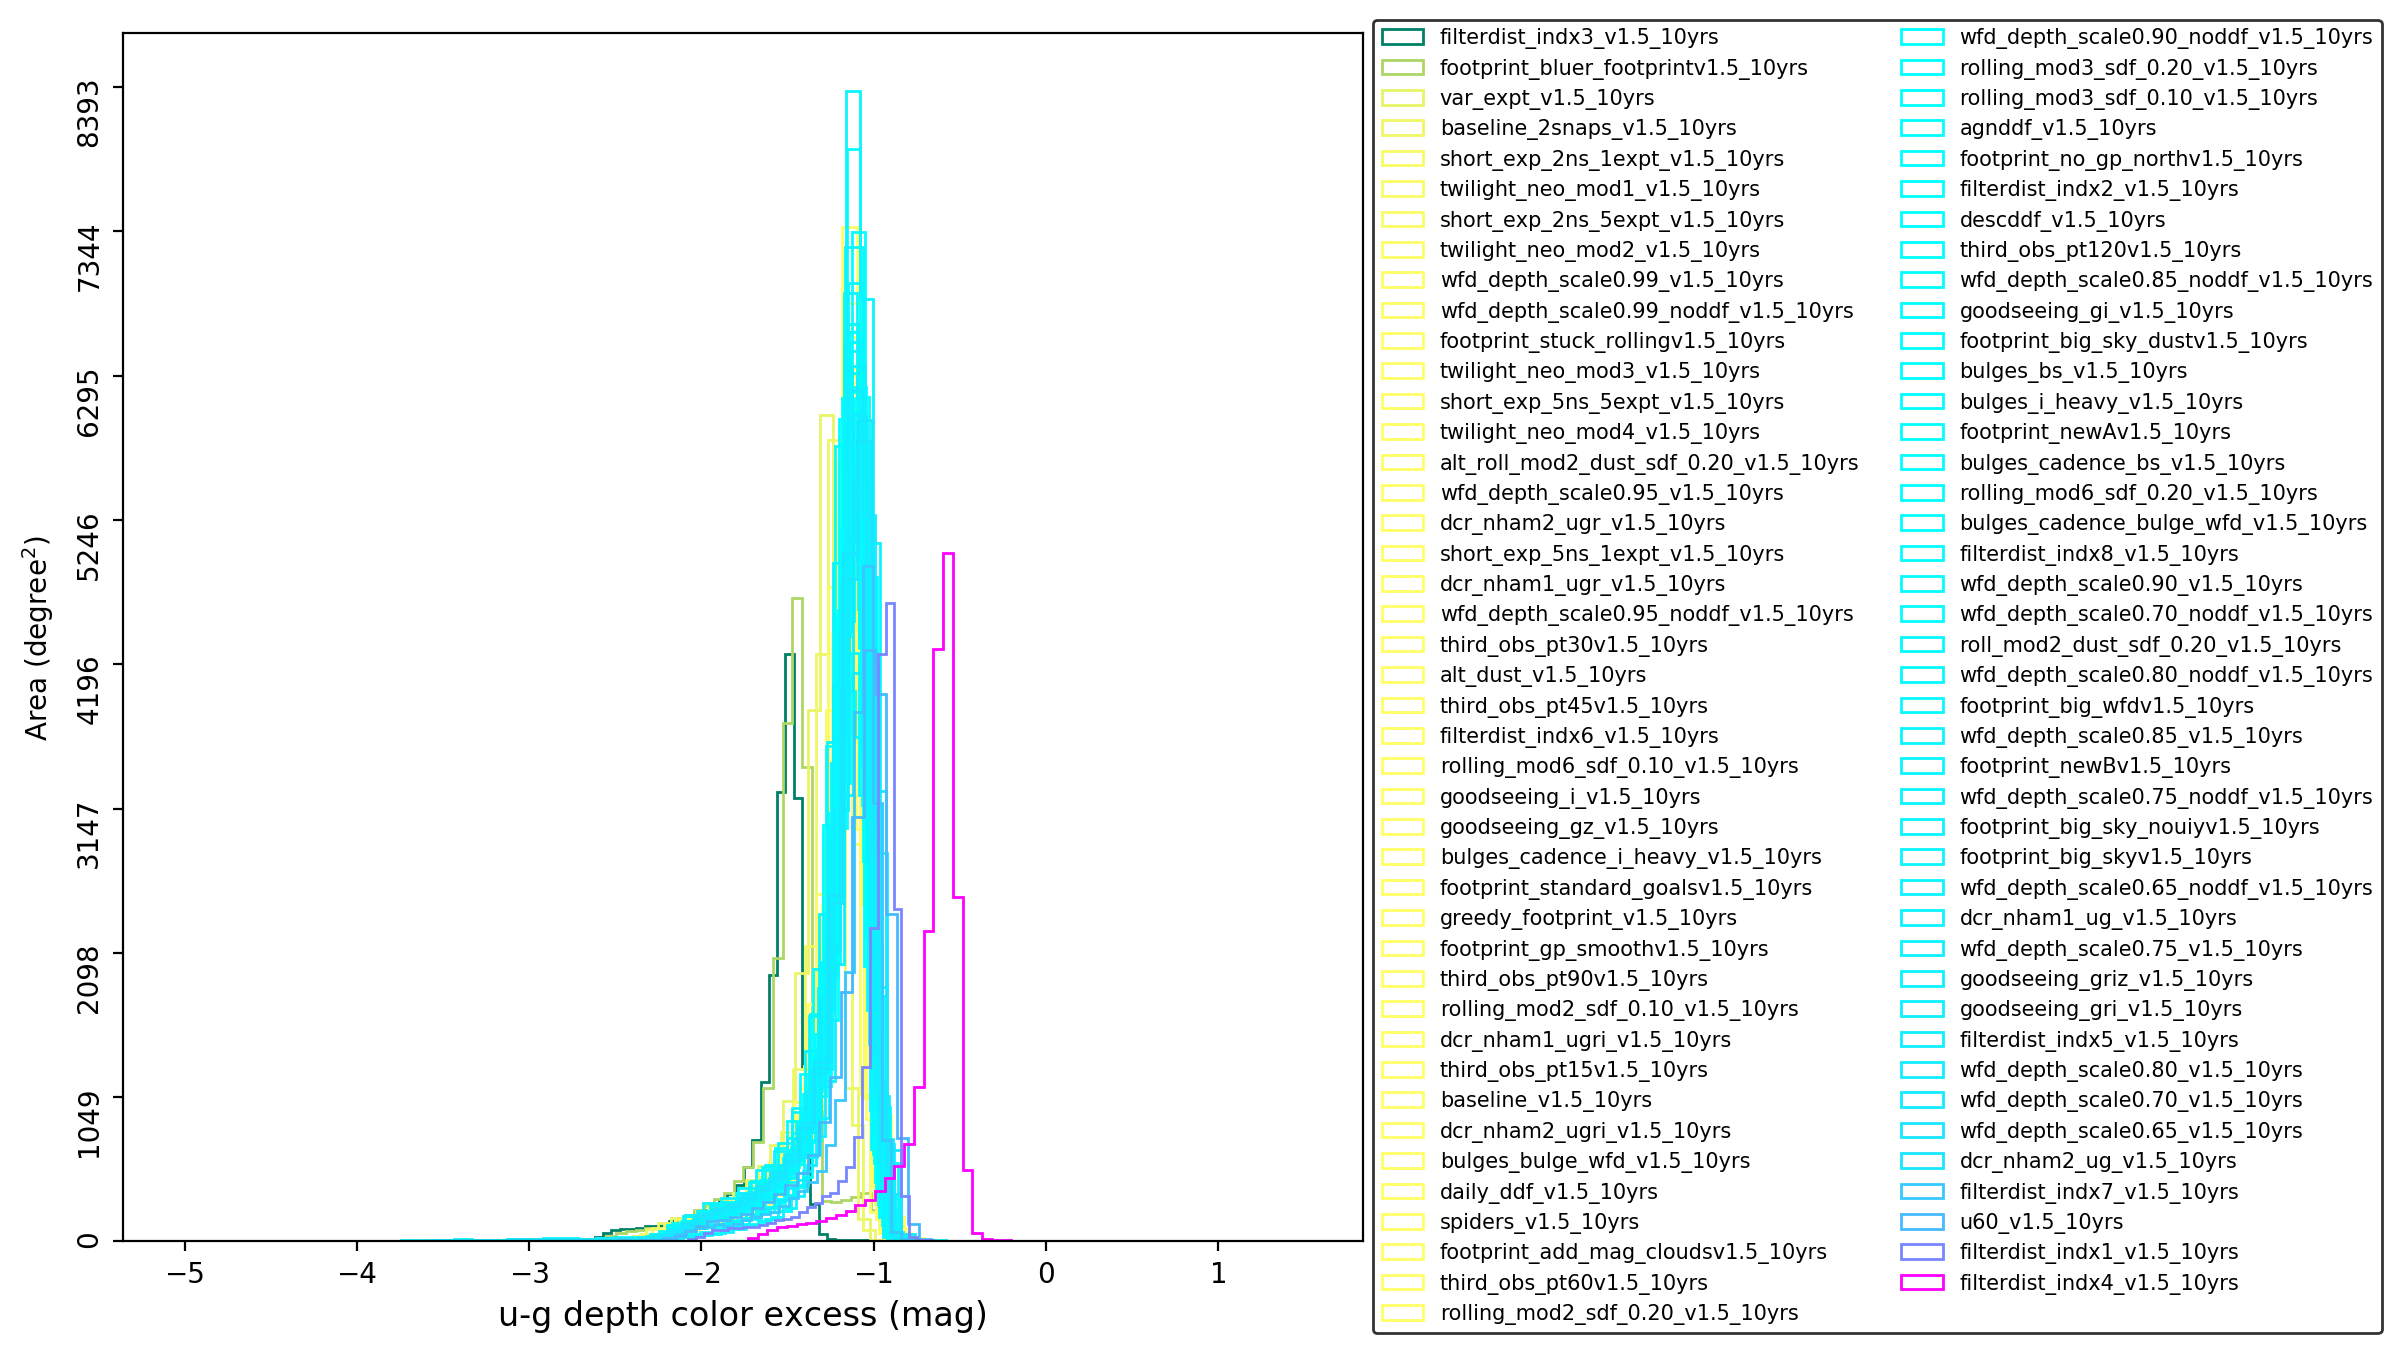

In [13]:
#Key to use
Key = Keys[0]
print(Key)

#Function to process the matric data through.
data_func = color_excess

#X-axis Label
xlabel = r"u-g depth color excess (mag)"

#Area of each element
healpix_pixarea = bundleDicts[dbRuns[0]][Key].slicer.pixArea * u.sr

#Plot FBS v1.5
plot_OpSims_hist(Key, bundleDicts, data_func=data_func, figsize=(8,8), FBS="v1.5", healpix_pixarea=healpix_pixarea, 
                 datamin=None, datamax=None, color_map=[mpl.cm.summer,mpl.cm.cool], xlabel=xlabel)

#Plot FBS v1.6
plot_OpSims_hist(Key, bundleDicts, data_func=data_func, figsize=(8,8), FBS="v1.6", healpix_pixarea=healpix_pixarea, 
                 datamin=None, datamax=None, color_map=mpl.cm.cool, xlabel=xlabel)

### g-r

In [14]:
quasar_color = Temple_colors('g-r',z,imag)
print(quasar_color)
def color_excess(color):
    return color-quasar_color

0.0333


(2, 'Exgalm5_color_with_cuts_AGN_gr_mean')
short_exp_5ns_1expt_v1.5_10yrs -0.2453638836753237
filterdist_indx1_v1.5_10yrs 0.4074113633181723


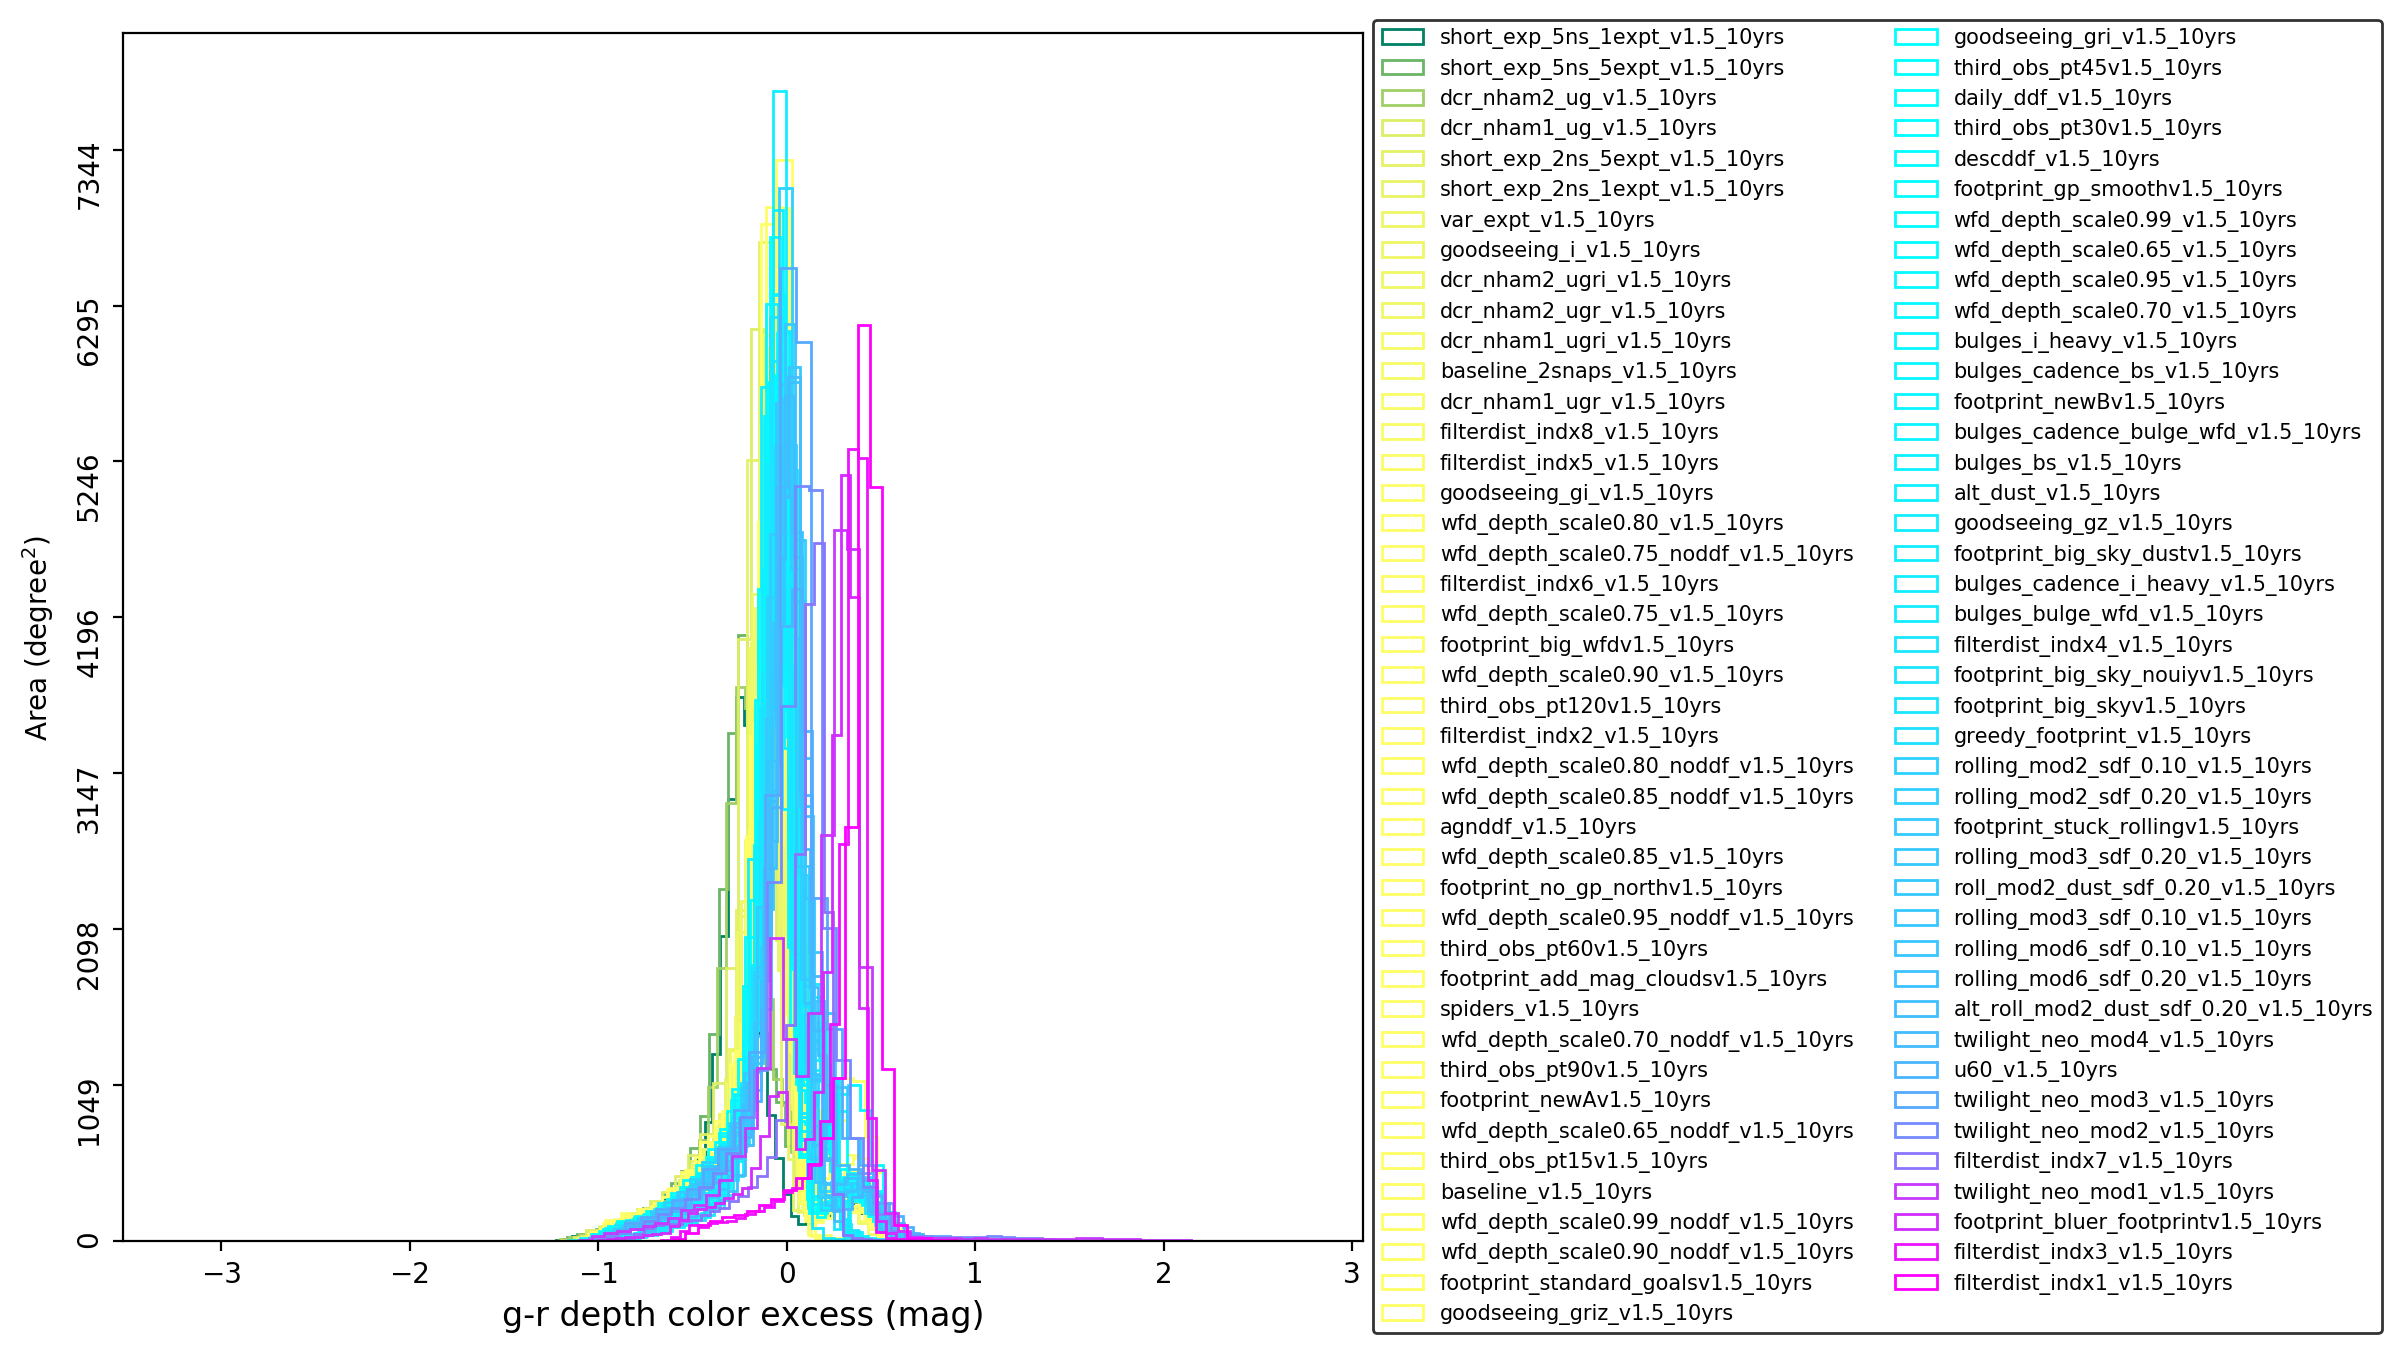

In [15]:
#Key to use
Key = Keys[1]
print(Key)

#Function to process the matric data through.
data_func = color_excess

#X-axis Label
xlabel = r"g-r depth color excess (mag)"

#Area of each element
healpix_pixarea = bundleDicts[dbRuns[0]][Key].slicer.pixArea * u.sr

#Plot FBS v1.5
plot_OpSims_hist(Key, bundleDicts, data_func=data_func, figsize=(8,8), FBS="v1.5", healpix_pixarea=healpix_pixarea, 
                 datamin=None, datamax=None, color_map=[mpl.cm.summer,mpl.cm.cool], xlabel=xlabel)

#Plot FBS v1.6
plot_OpSims_hist(Key, bundleDicts, data_func=data_func, figsize=(8,8), FBS="v1.6", healpix_pixarea=healpix_pixarea, 
                 datamin=None, datamax=None, color_map=mpl.cm.cool, xlabel=xlabel)

### r-i

In [16]:
quasar_color = Temple_colors('r-i',z,imag)
print(quasar_color)
def color_excess(color):
    return color-quasar_color

0.1936


(3, 'Exgalm5_color_with_cuts_AGN_ri_mean')
filterdist_indx6_v1.5_10yrs 0.11129736789703948
filterdist_indx3_v1.5_10yrs 0.37760028044276694


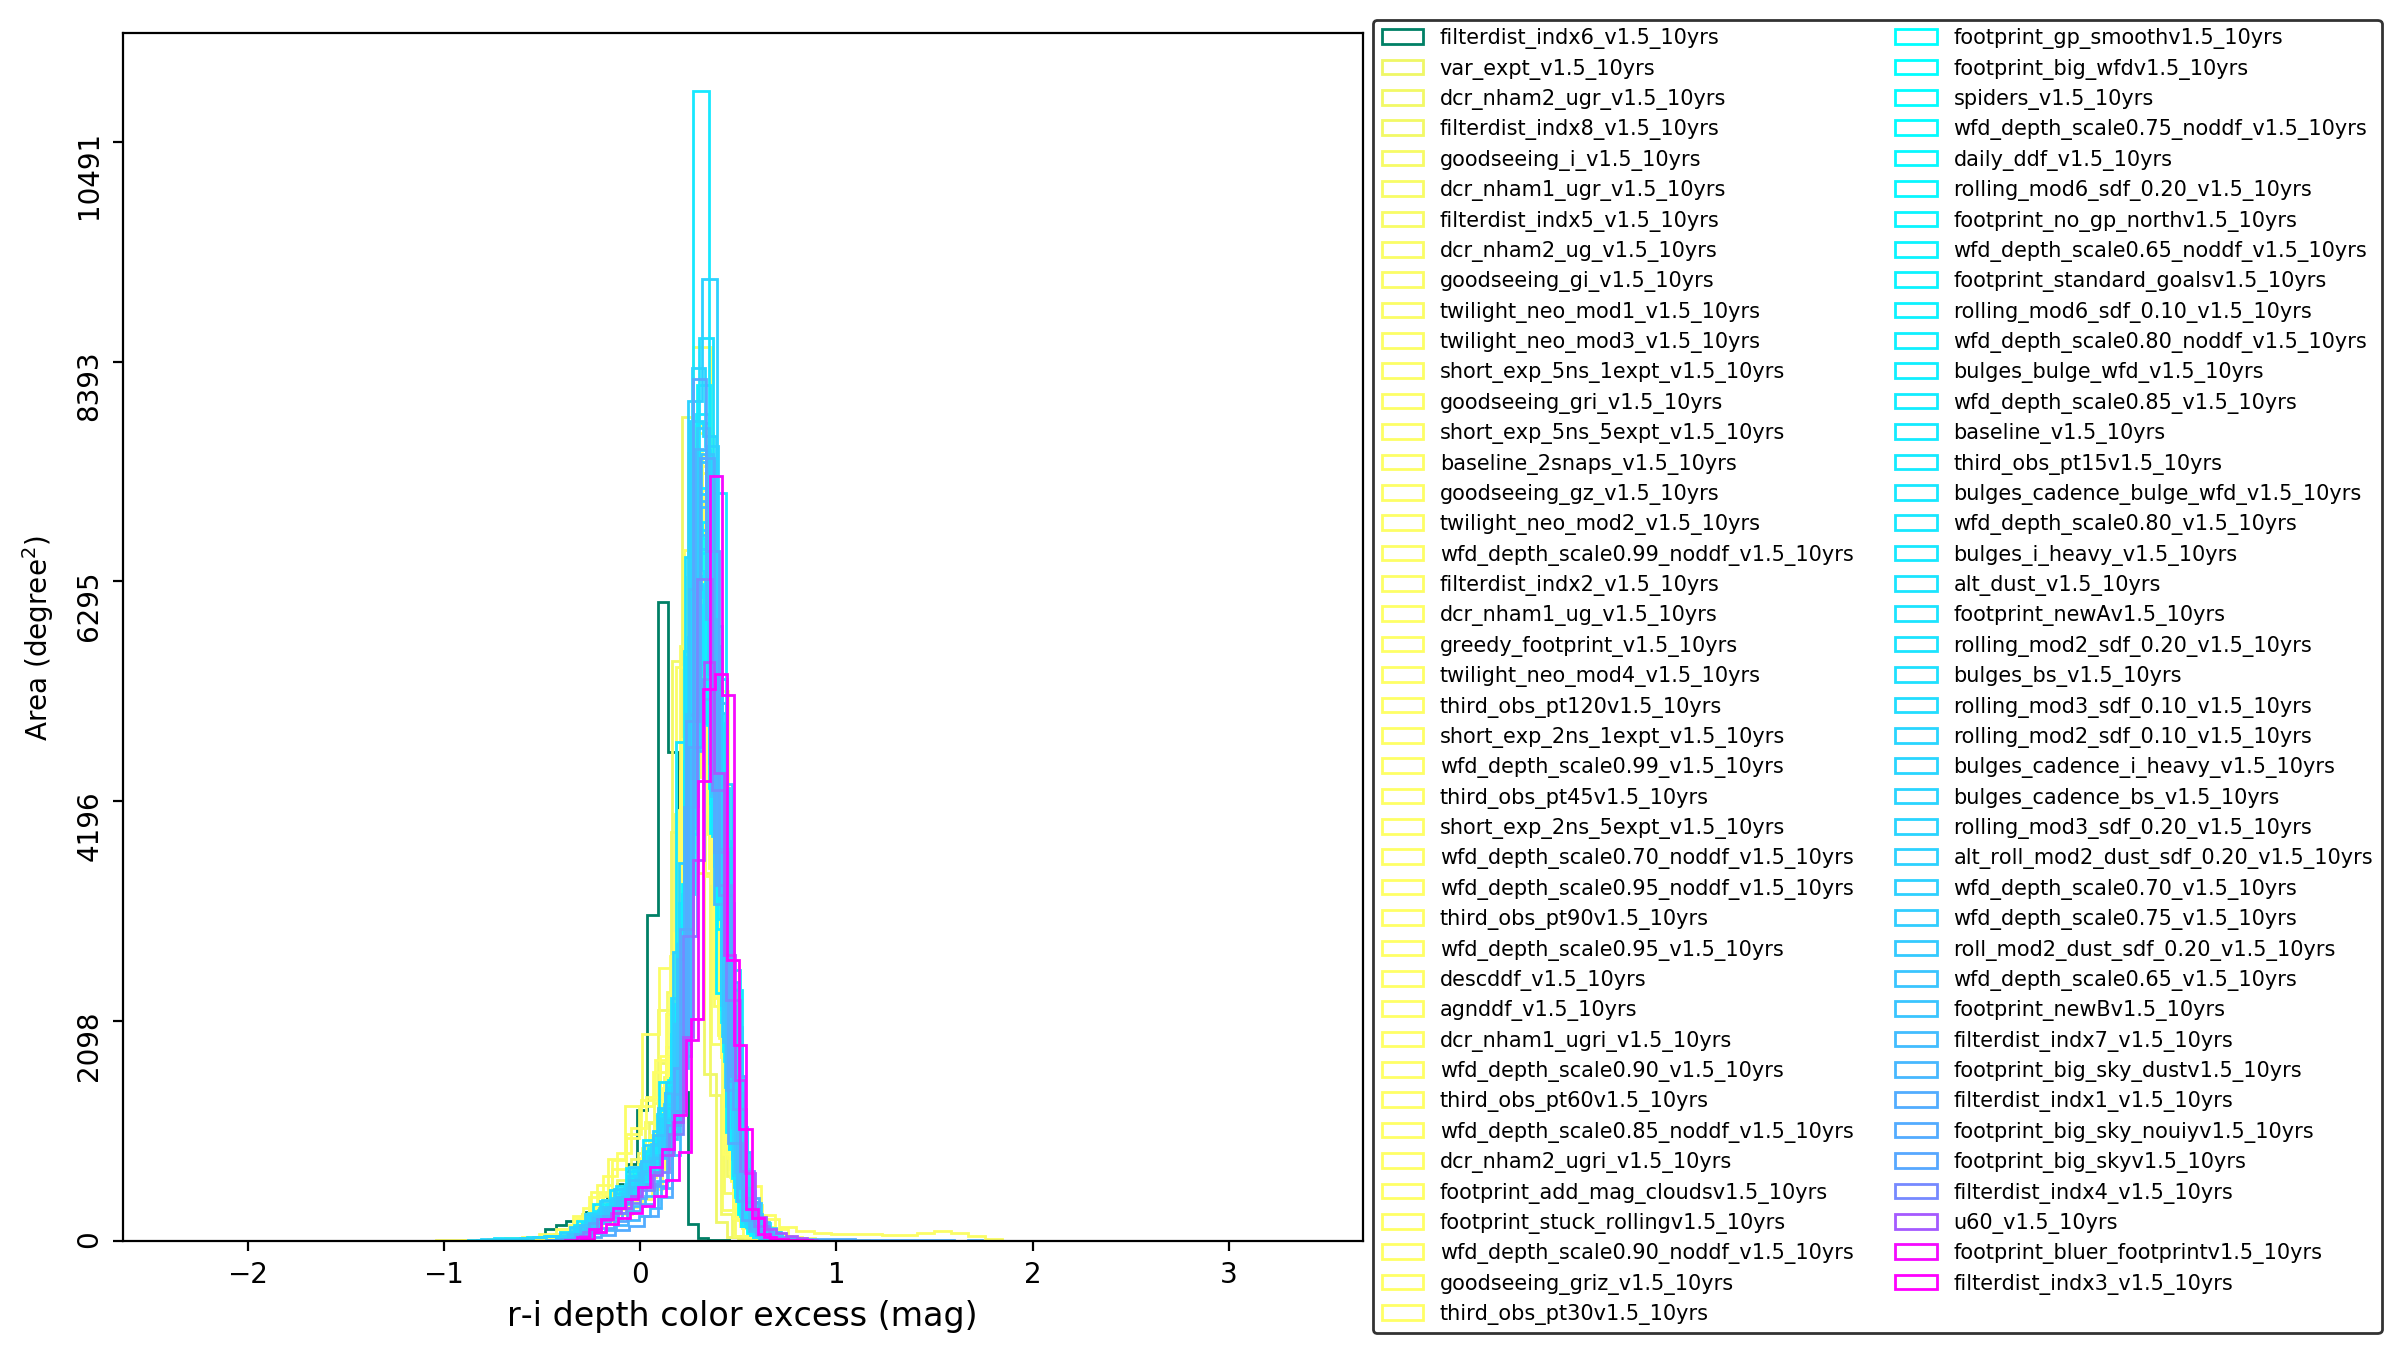

In [17]:
#Key to use
Key = Keys[2]
print(Key)

#Function to process the matric data through.
data_func = color_excess

#X-axis Label
xlabel = r"r-i depth color excess (mag)"

#Area of each element
healpix_pixarea = bundleDicts[dbRuns[0]][Key].slicer.pixArea * u.sr

#Plot FBS v1.5
plot_OpSims_hist(Key, bundleDicts, data_func=data_func, figsize=(8,8), FBS="v1.5", healpix_pixarea=healpix_pixarea, 
                 datamin=None, datamax=None, color_map=[mpl.cm.summer,mpl.cm.cool], xlabel=xlabel)

#Plot FBS v1.6
plot_OpSims_hist(Key, bundleDicts, data_func=data_func, figsize=(8,8), FBS="v1.6", healpix_pixarea=healpix_pixarea, 
                 datamin=None, datamax=None, color_map=mpl.cm.cool, xlabel=xlabel)

### i-z

In [18]:
quasar_color = Temple_colors('i-z',z,imag)
print(quasar_color)
def color_excess(color):
    return color-quasar_color

0.1951


(4, 'Exgalm5_color_with_cuts_AGN_iz_mean')
filterdist_indx5_v1.5_10yrs 0.2688691105701118
filterdist_indx6_v1.5_10yrs 0.6675974664991617


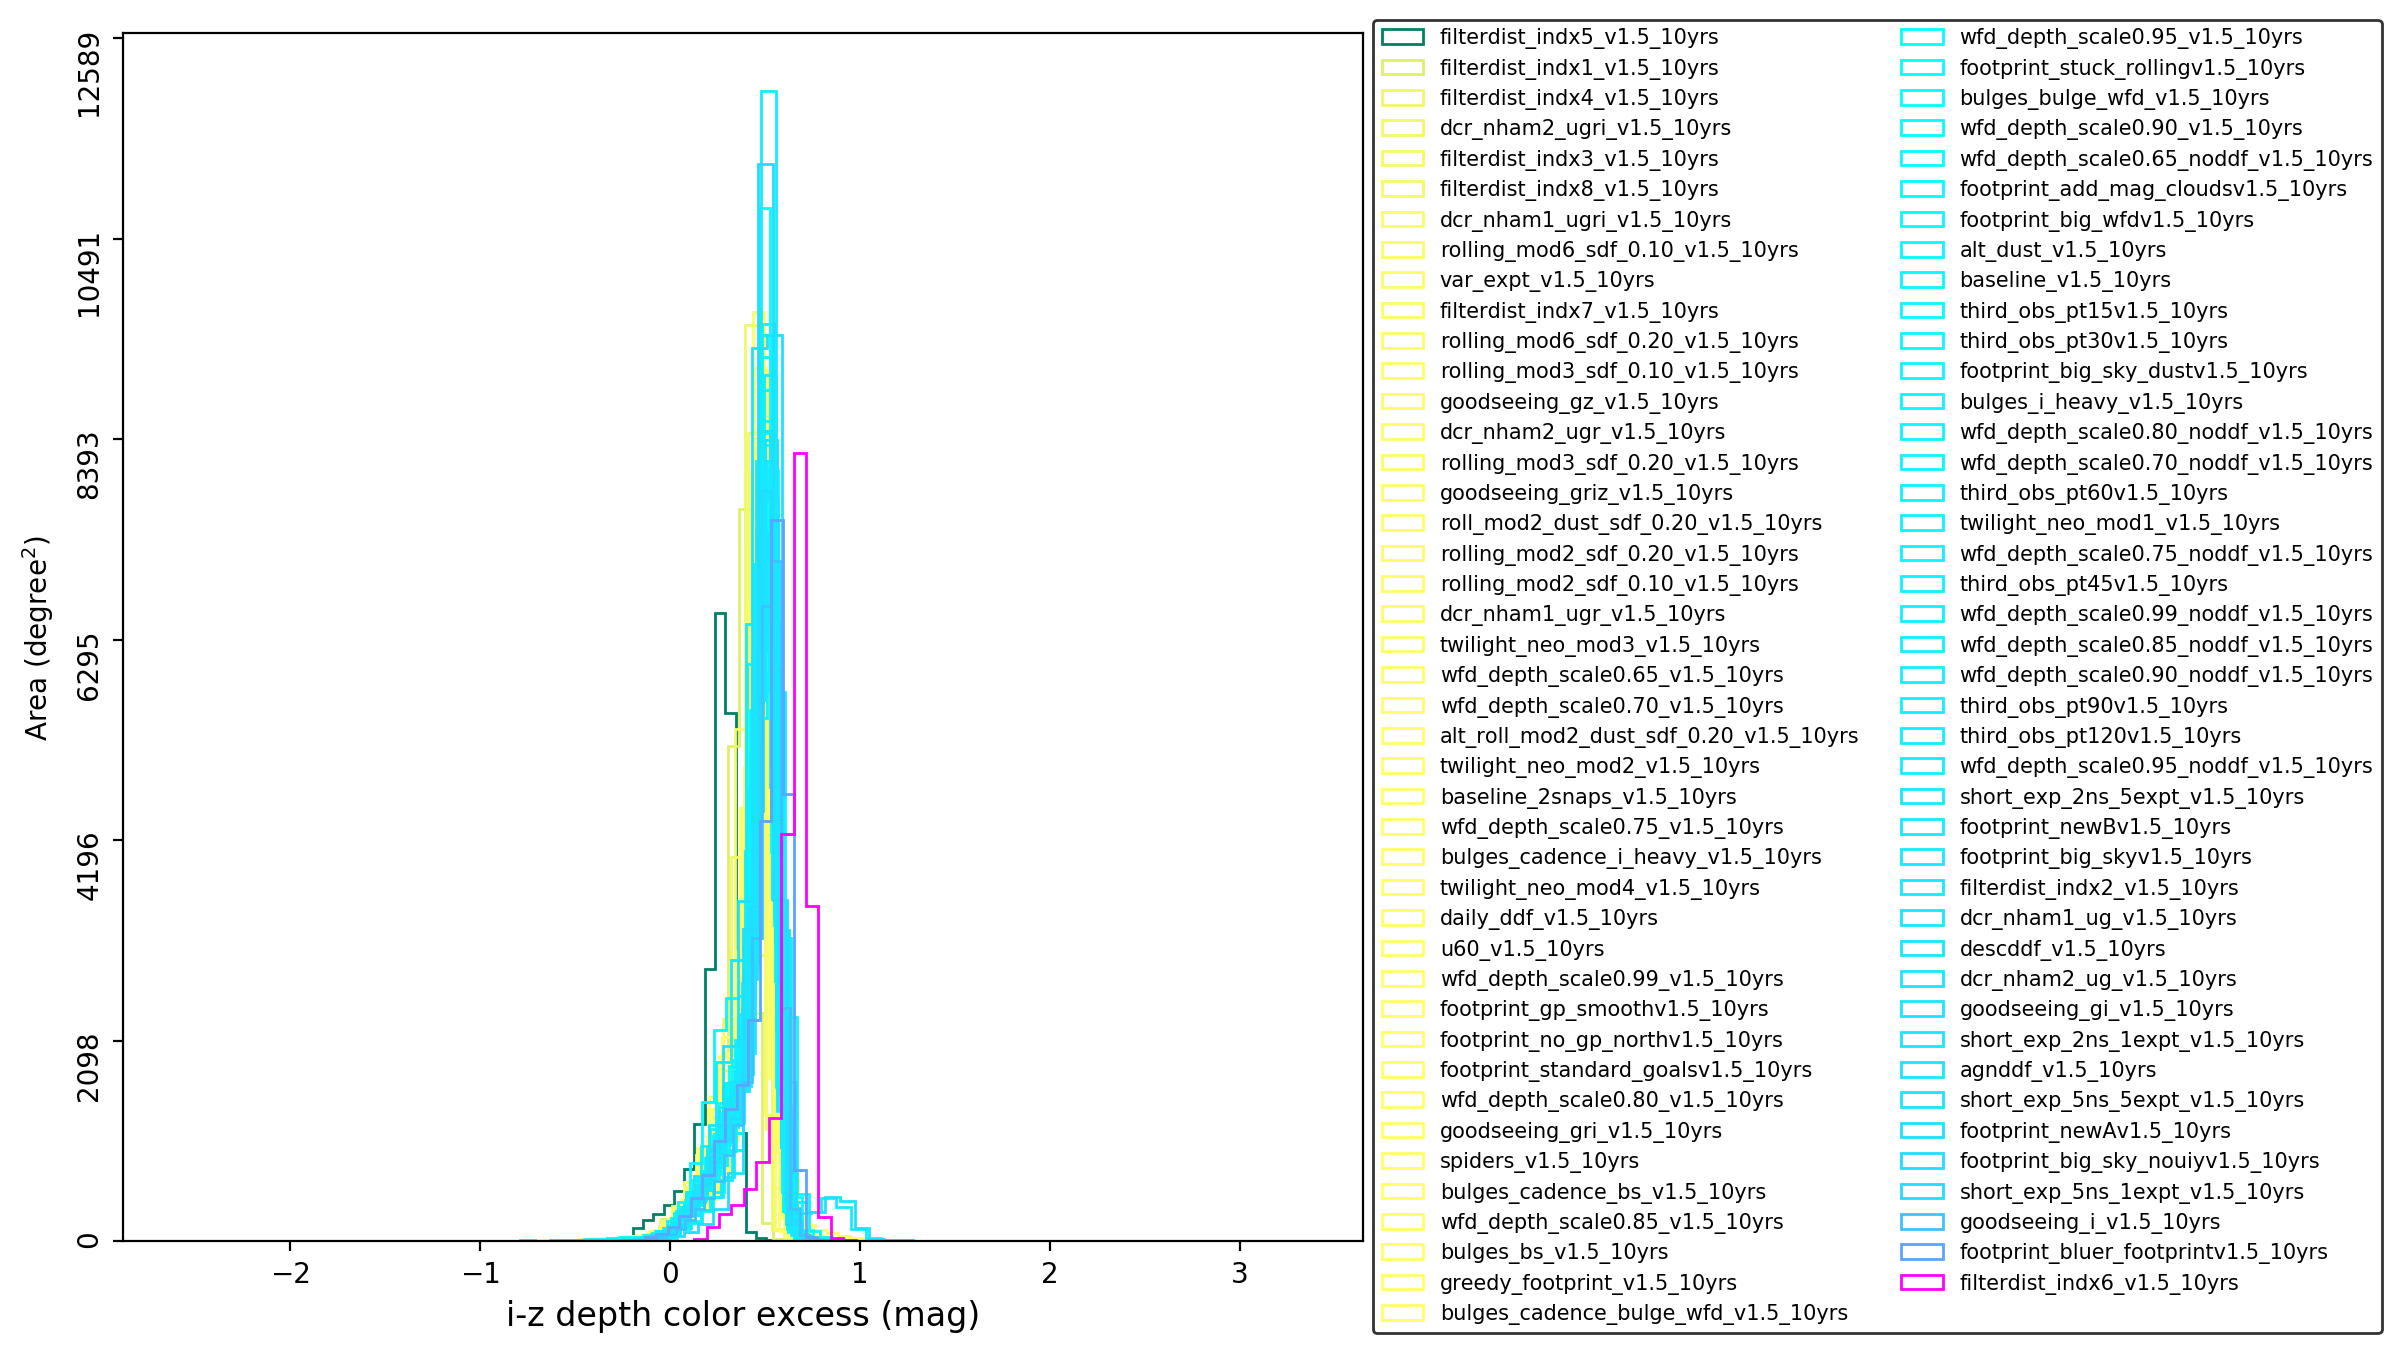

In [19]:
#Key to use
Key = Keys[3]
print(Key)

#Function to process the matric data through.
data_func = color_excess

#X-axis Label
xlabel = r"i-z depth color excess (mag)"

#Area of each element
healpix_pixarea = bundleDicts[dbRuns[0]][Key].slicer.pixArea * u.sr

#Plot FBS v1.5
plot_OpSims_hist(Key, bundleDicts, data_func=data_func, figsize=(8,8), FBS="v1.5", healpix_pixarea=healpix_pixarea, 
                 datamin=None, datamax=None, color_map=[mpl.cm.summer,mpl.cm.cool], xlabel=xlabel)

#Plot FBS v1.6
plot_OpSims_hist(Key, bundleDicts, data_func=data_func, figsize=(8,8), FBS="v1.6", healpix_pixarea=healpix_pixarea, 
                 datamin=None, datamax=None, color_map=mpl.cm.cool, xlabel=xlabel)

### z-y

In [20]:
quasar_color = Temple_colors('z-y',z,imag)
print(quasar_color)
def color_excess(color):
    return color-quasar_color

-0.0291


(5, 'Exgalm5_color_with_cuts_AGN_zy_mean')
twilight_neo_mod1_v1.5_10yrs 0.3752940594026718
var_expt_v1.5_10yrs 0.8659011887280194


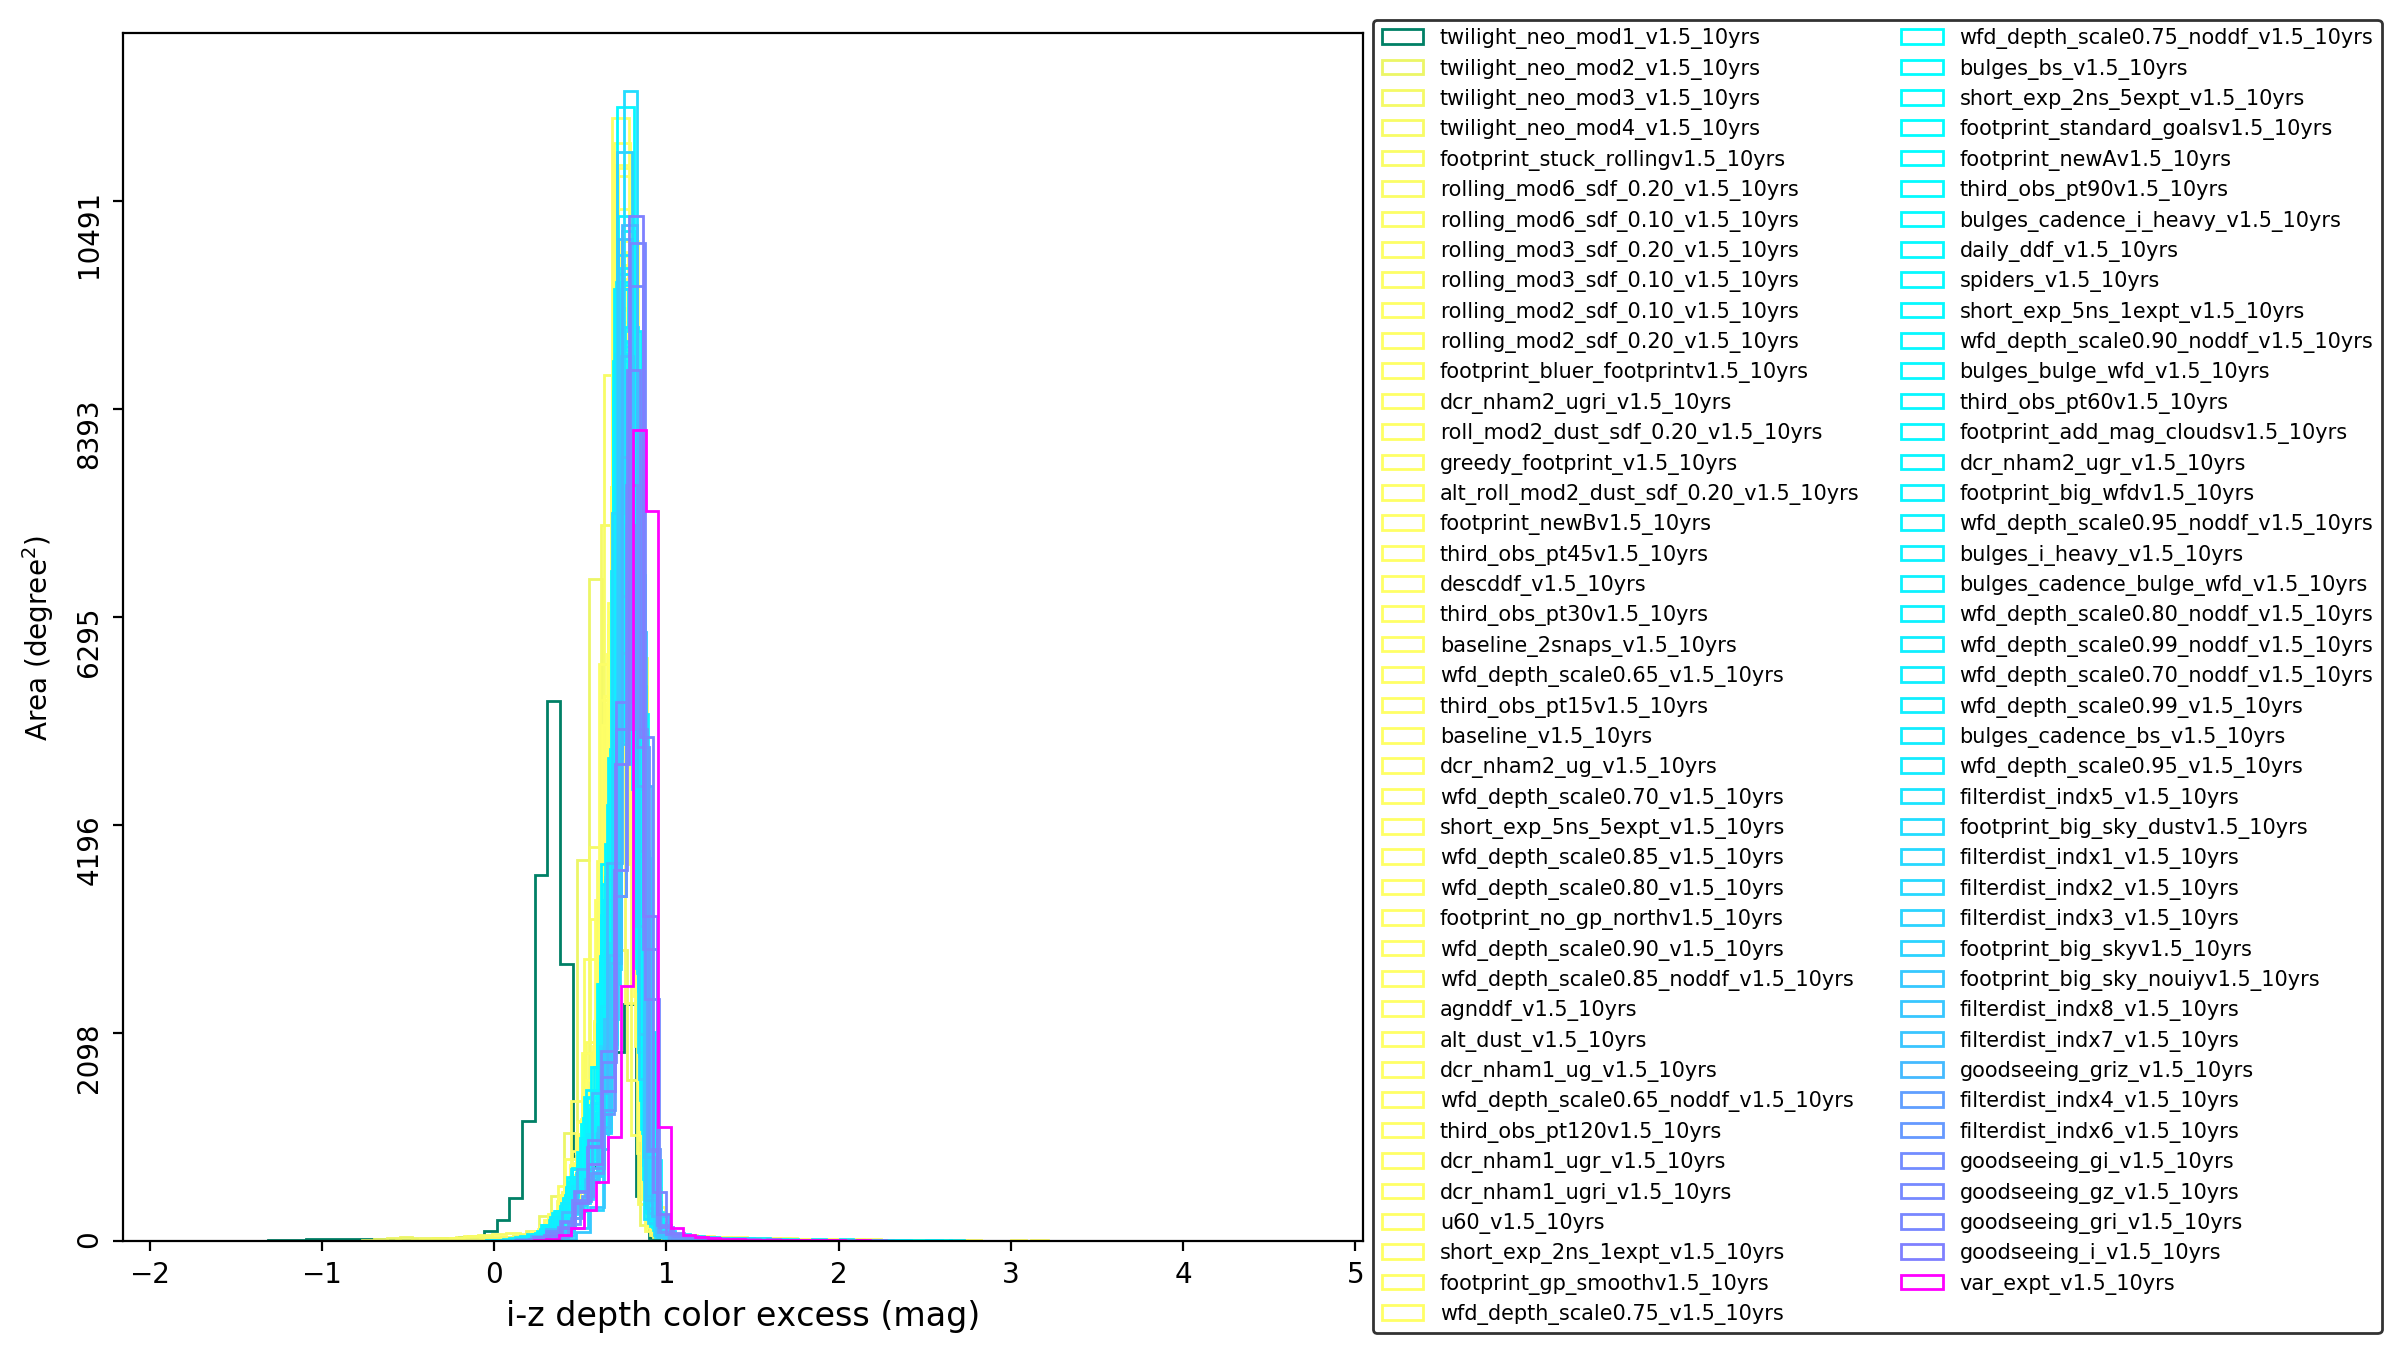

In [21]:
#Key to use
Key = Keys[4]
print(Key)

#Function to process the matric data through.
data_func = color_excess

#X-axis Label
xlabel = r"i-z depth color excess (mag)"

#Area of each element
healpix_pixarea = bundleDicts[dbRuns[0]][Key].slicer.pixArea * u.sr

#Plot FBS v1.5
plot_OpSims_hist(Key, bundleDicts, data_func=data_func, figsize=(8,8), FBS="v1.5", healpix_pixarea=healpix_pixarea, 
                 datamin=None, datamax=None, color_map=[mpl.cm.summer,mpl.cm.cool], xlabel=xlabel)

#Plot FBS v1.6
plot_OpSims_hist(Key, bundleDicts, data_func=data_func, figsize=(8,8), FBS="v1.6", healpix_pixarea=healpix_pixarea, 
                 datamin=None, datamax=None, color_map=mpl.cm.cool, xlabel=xlabel)